In [40]:
include("lane_change_env.jl")

create_env (generic function with 1 method)

In [41]:
ncars = 5
nlanes = 4
road_length = 200.

scene, roadway = create_env(ncars, nlanes, road_length)

"true" = "true"
spots_taken = Tuple{Int64,Float64}[(0, 0.0)]
spots_taken = Tuple{Int64,Float64}[(0, 0.0), (2, 60.0)]
"true" = "true"
spots_taken = Tuple{Int64,Float64}[(0, 0.0), (2, 60.0)]
spots_taken = Tuple{Int64,Float64}[(0, 0.0), (2, 60.0), (4, 90.0)]
"true" = "true"
spots_taken = Tuple{Int64,Float64}[(0, 0.0), (2, 60.0), (4, 90.0)]
spots_taken = Tuple{Int64,Float64}[(0, 0.0), (2, 60.0), (4, 90.0), (3, 200.0)]
"true" = "true"
spots_taken = Tuple{Int64,Float64}[(0, 0.0), (2, 60.0), (4, 90.0), (3, 200.0)]
spots_taken = Tuple{Int64,Float64}[(0, 0.0), (2, 60.0), (4, 90.0), (3, 200.0), (2, 110.0)]
"true" = "true"
spots_taken = Tuple{Int64,Float64}[(0, 0.0), (2, 60.0), (4, 90.0), (3, 200.0), (2, 110.0)]
spots_taken = Tuple{Int64,Float64}[(0, 0.0), (2, 60.0), (4, 90.0), (3, 200.0), (2, 110.0), (3, 170.0)]


(Scene(with 5 cars), Roadway)

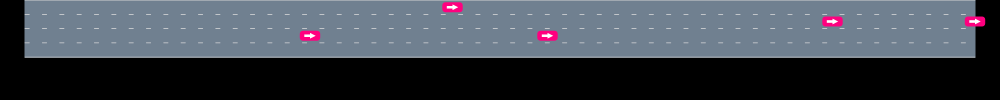

In [42]:
cam = StaticCamera(VecE2(100.0,0.0), 4.75)
render(scene, roadway, cam=cam, canvas_height=100)